# Preparation

In [1]:
# This file is based on: 0_regression_presence_of_accident
# Remove features which were found correlated with others
# Remove the categorical features which has only two categories

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [7]:
from mtp_function_yl import *

In [8]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay

import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [11]:
%watermark  -u -d -v -m --iversions

Last updated: 2024-10-11

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.14.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.0-119-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

mlxtend    : 0.23.1
statsmodels: 0.14.0
numpy      : 1.26.4
matplotlib : 3.7.2
pandas     : 2.0.3
sklearn    : 1.3.0
torch      : 2.0.1
pyproj     : 3.6.1
shapely    : 2.0.2
seaborn    : 0.12.2
cv2        : 4.8.1
scipy      : 1.11.2
PIL        : 10.0.0



# Data loading

## For science cluster environment

In [12]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [13]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [14]:
# same size
acv0 = acv.drop(['SV','LV','pd','svp','lvp','pdp'], axis = 1)
acv0 = acv0.assign(acp = 1)
acv0 = acv0.rename(columns = {'Nr':'id'})

In [15]:
rpv0 = rpv.drop(['speedlimit_7', 'z_qnr_34'], axis = 1)
rpv0 = rpv0.assign(acp = 0)

In [16]:
dfacrpv = pd.concat([acv0, rpv0])

In [17]:
len(dfacrpv.columns.values)

110

In [18]:
# dfacrpv.to_csv('/home/yelhe/script/mt/model/dfacrpv.csv', index = False)

## Pre Processing

In [19]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

# Remove id, droad_sl ,'d_bicyclecount' 'd_carcount' 'curbtype'  
# 'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [20]:
# remove features which has correlation <-0.8 or > 0.8

In [21]:
# correlation analysis result
dfcorr = pd.read_csv('/home/yelhe/script/mtp/tables/sorted_unique_corrpairs.csv')

In [22]:
dfcorr.columns

Index(['Unnamed: 0', 'Unnamed: 1', '0'], dtype='object')

In [23]:
dfcorr = dfcorr.rename(columns = {'Unnamed: 0':'feature1', 'Unnamed: 1':'feature2',
                                  '0':'correlation'})

In [26]:
dfcorr_high = dfcorr.loc[(dfcorr['correlation'] <= -0.8) | (dfcorr['correlation'] >= 0.8)]

In [27]:
dfcorr_high

,feature1,feature2,correlation
0,curbtype_2,curbtype_1,-1.000000
1,r_surface_2,r_surface_1,-1.000000
2,speedlimit_2,speedlimit_value,-0.843848
4742,mewmax,mew,0.843518
4743,megmin,meg,0.859393
4744,mewmin,mew,0.861981
4745,cmean,cp,0.906091
4746,iemax,ie,0.919919
4747,cmax,cp,0.940030
4748,iemin,ie,0.957061


In [ ]:
# Above using pairwise correlation

In [276]:
# remove based on correlation
# speedlimit_2, 
# mewmax, mewmin, megmin, iemax, iemin, 
# cmean, cmax, gvm_ asp, gvm_msp

# remove based on data source
# dcurb (correlated to droad, and based on concept model), curbtype_1

# Only n-1 dummy variables are needed for n-category variable
# remove
# r_width_7, speedlimit_6, z_qnr_33, z_knr_12, trafficarea_3, curbtype_2, r_surface_2

# updated 
cnu = ['cp', 'ie', 'mew', 'meg', 
       'megmax', 'cmin', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

cnu1 = ['cp', 'cmean', 'cmin', 'ie', 'mew', 'meg', 
       'megmax', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

# Replace cp with cmean
cnu2 = ['cmean', 'cmin', 'ie', 'mew', 'meg', 
       'megmax', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

In [321]:
len(cnu1)

80

In [286]:
y = dfacrpv['acp']
# x = dfacrpv[cnu]
x = dfacrpv[cnu1] 

In [287]:
# y.shape
x.shape
# 1087 points with 78 features in total

(1087, 80)

## Distribution check: Kolmogorov-Smirnov test 

In [31]:
# Check if distributions of curb-related variables of accident-present points and accident-absent point are the same or not

In [32]:
dfacp1 = dfacrpv.loc[dfacrpv['acp'] == 1]
dfacp0 = dfacrpv.loc[dfacrpv['acp'] == 0]

In [33]:
cp_1 = dfacp1['cp']
cp_2 = dfacp0['cp']

In [34]:
from scipy.stats import ks_2samp
ks_2samp(cp_1, cp_2)

KstestResult(statistic=0.084959767163157, pvalue=0.08376157447812585, statistic_location=0, statistic_sign=1)

In [35]:
ks_2samp(dfacp1['cmean'], dfacp0['cmean'])

KstestResult(statistic=0.4065656565656566, pvalue=2.2447396953763978e-32, statistic_location=-1.083670242208321, statistic_sign=-1)

In [36]:
ks_2samp(dfacp1['cmin'], dfacp0['cmin'])

KstestResult(statistic=0.9864406779661017, pvalue=2.1498339547925026e-256, statistic_location=-0.1172420763521098, statistic_sign=1)

In [37]:
ks_2samp(dfacp1['cmax'], dfacp0['cmax'])

KstestResult(statistic=0.4065656565656566, pvalue=2.2447396953763978e-32, statistic_location=-1.1269889934709814, statistic_sign=-1)

# Orginal regression model without feature selection

In [288]:
# Using updated features collection (84 instead of 98)

## OLS linear regression

### Without data splitting

In [289]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

# m00 = sm.OLS(y, x)
# r00 = m00.fit()
# r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     21.53
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.01e-166
Time:                        18:20:03   Log-Likelihood:                -119.26
No. Observations:                1087   AIC:                             400.5
Df Residuals:                    1006   BIC:                             804.8
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1822      0.171      1.065      0.287      -0.154       0.518
cp                  -0.2189      0.044     -5.026      0.000      -0.304      -0.133
cmean                0.1192      0.023      5.270      0.000       0.075       0.164
cmin                -0.0191      0.009     -2.077      0.038      -0.037      -0.001
ie                  -0.0098      0.009     -1.048      0.295      -0.028       0.009
mew                  0.0092      0.010      0.926      0.355      -0.010       0.029
meg                 -0.0099      0.014     -0.690      0.490      -0.038       0.018
megmax               0.0116      0.014      0.862      0.389      -0.015       0.038
dbusl               -0.0175      0.012     -1.498      0.134      -0.040       0.005
dtraml               0.0209      0.012      1.706      0.088      -0.003       0.045
dtrainl              0.0211      0.011      1.900      0.058      -0.001       0.043
dplight              0.0110      0.010      1.131      0.258      -0.008       0.030
dstation             0.0042      0.011      0.371      0.711      -0.018       0.026
dparkcar            -0.0054      0.012     -0.472      0.637      -0.028       0.017
dparktw             -0.0039      0.011     -0.357      0.721      -0.025       0.017
dpedcro             -0.0016      0.011     -0.151      0.880      -0.023       0.019
dstopsign            0.0345      0.012      2.801      0.005       0.010       0.059
dtrafficarea         0.0161      0.014      1.143      0.253      -0.012       0.044
droad               -0.0096      0.010     -0.963      0.336      -0.029       0.010
dvfpath             -0.0139      0.009     -1.487      0.137      -0.032       0.004
gvm_dwv             -0.0023      0.011     -0.204      0.838      -0.024       0.020
bicyclecount        -0.0071      0.010     -0.680      0.497      -0.028       0.013
carcount             0.0020      0.010      0.190      0.849      -0.018       0.022
r_width_value       -0.1325      0.021     -6.331      0.000      -0.174      -0.091
speedlimit_value    -0.0509      0.020     -2.599      0.009      -0.089      -0.012
z_qnr_1              0.7847      0.131      5.984      0.000       0.527       1.042
z_qnr_2              0.5317      0.120      4.432      0.000       0.296       0.767
z_qnr_3              0.5648      0.121      4.653      0.000       0.327       0.803
z_qnr_4              0.6623      0.129      5.138      0.000       0.409       0.915
z_qnr_5              0.5921      0.101      5.851      0.000       0.393       0.791
z_qnr_6              0.4154      0.124      3.362      0.001       0.173       0.658
z_qnr_7              0.9287      0.118      7.843      0.000       0.696       1.161
z_qnr_8              0.7788      0.102      7.669      0.000       0.580       0.978
z_qnr_9              0.

In [318]:
dfp = r00.pvalues
print(dfp[dfp<=0.05].size)
dfp[dfp<=0.05]

46


cp                  5.919694e-07
cmean               1.673415e-07
cmin                3.804878e-02
dstopsign           5.189140e-03
r_width_value       3.668149e-10
speedlimit_value    9.492398e-03
z_qnr_1             3.017575e-09
z_qnr_2             1.035196e-05
z_qnr_3             3.702470e-06
z_qnr_4             3.330182e-07
z_qnr_5             6.621871e-09
z_qnr_6             8.016845e-04
z_qnr_7             1.120268e-14
z_qnr_8             4.092890e-14
z_qnr_9             1.673615e-06
z_qnr_11            1.101188e-11
z_qnr_12            4.116613e-12
z_qnr_14            1.145803e-11
z_qnr_15            3.635676e-09
z_qnr_16            6.396508e-06
z_qnr_17            5.915800e-03
z_qnr_18            9.362572e-05
z_qnr_21            5.622229e-04
z_qnr_22            3.404470e-03
z_qnr_28            5.963672e-03
z_qnr_29            2.202547e-03
z_qnr_31            1.397626e-02
z_qnr_32            1.295431e-02
z_knr_1             2.416115e-08
z_knr_2             2.887569e-06
z_knr_3   

0.9162833486660533

Test accuracy : 
 0.9162833486660533

Confusion Matrix : 
 [[768  24]
 [ 67 228]]


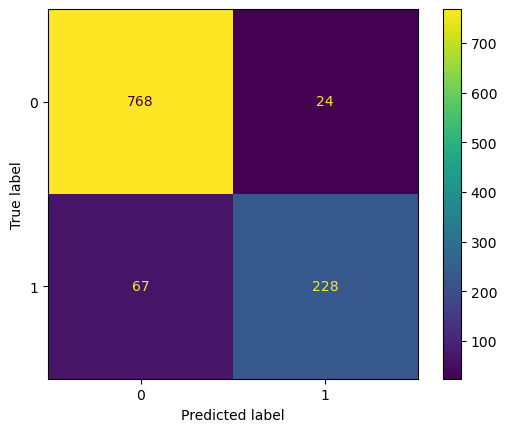

In [290]:
pred00 = r00.predict(x_const)
pred00 = list(map(round,pred00))
print(accuracy_score(y, pred00))
print('\nTest accuracy : \n', accuracy_score(y, pred00))
cm00 = confusion_matrix(y, pred00) 
print ('\nConfusion Matrix : \n', cm00)
cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
cm00_display.plot()

In [291]:
acc_ols = metrics.accuracy_score(y, pred00)
print('accuracy', acc_ols)

pre_ols = metrics.precision_score(y, pred00, average = None)
print('precision', pre_ols)

senrec_ols = metrics.recall_score(y, pred00, average = None)
print('sensitivity recall', senrec_ols)

f1_ols = metrics.f1_score(y, pred00, average = None)
print('f1 score', f1_ols)

pre_ols_m = np.mean(pre_ols)
senrec_ols_m = np.mean(senrec_ols)
f1_ols_m = np.mean(f1_ols)
print('mean precision', pre_ols_m)
print('mean recall', senrec_ols_m)
print('mean f1 score', f1_ols_m)

accuracy 0.9162833486660533
precision [0.91976048 0.9047619 ]
sensitivity recall [0.96969697 0.77288136]
f1 score [0.94406884 0.83363803]
mean precision 0.9122611919019105
mean recall 0.8712891628145866
mean f1 score 0.8888534319734733


### With data splitting

In [292]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=2)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     15.66
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          7.86e-109
Time:                        18:20:05   Log-Likelihood:                -71.672
No. Observations:                 760   AIC:                             305.3
Df Residuals:                     679   BIC:                             680.6
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1044      0.227     -0.461      0.645      -0.550       0.341
cp                  -0.2319      0.054     -4.308      0.000      -0.338      -0.126
cmean                0.1436      0.028      5.091      0.000       0.088       0.199
cmin                -0.0241      0.010     -2.452      0.014      -0.043      -0.005
ie                  -0.0099      0.011     -0.886      0.376      -0.032       0.012
mew                  0.0138      0.012      1.159      0.247      -0.010       0.037
meg                 -0.0018      0.017     -0.106      0.916      -0.036       0.032
megmax               0.0188      0.016      1.145      0.253      -0.013       0.051
dbusl               -0.0073      0.014     -0.520      0.604      -0.035       0.020
dtraml               0.0219      0.015      1.437      0.151      -0.008       0.052
dtrainl              0.0204      0.014      1.498      0.134      -0.006       0.047
dplight              0.0052      0.012      0.444      0.657      -0.018       0.028
dstation             0.0079      0.014      0.577      0.564      -0.019       0.035
dparkcar            -0.0094      0.014     -0.676      0.499      -0.037       0.018
dparktw              0.0096      0.013      0.730      0.466      -0.016       0.035
dpedcro             -0.0014      0.013     -0.110      0.912      -0.027       0.024
dstopsign            0.0210      0.015      1.378      0.169      -0.009       0.051
dtrafficarea         0.0263      0.017      1.524      0.128      -0.008       0.060
droad                0.0078      0.013      0.612      0.541      -0.017       0.033
dvfpath             -0.0191      0.012     -1.535      0.125      -0.044       0.005
gvm_dwv             -0.0113      0.013     -0.847      0.397      -0.038       0.015
bicyclecount        -0.0168      0.012     -1.341      0.180      -0.041       0.008
carcount             0.0075      0.013      0.579      0.562      -0.018       0.033
r_width_value       -0.1157      0.026     -4.501      0.000      -0.166      -0.065
speedlimit_value    -0.0588      0.023     -2.524      0.012      -0.105      -0.013
z_qnr_1              0.7537      0.158      4.773      0.000       0.444       1.064
z_qnr_2              0.4802      0.155      3.093      0.002       0.175       0.785
z_qnr_3              0.5985      0.153      3.918      0.000       0.299       0.898
z_qnr_4              0.6322      0.159      3.985      0.000       0.321       0.944
z_qnr_5              0.5438      0.129      4.199      0.000       0.290       0.798
z_qnr_6              0.3809      0.147      2.585      0.010       0.092       0.670
z_qnr_7              0.9468      0.154      6.155      0.000       0.645       1.249
z_qnr_8              0.6759      0.131      5.147      0.000       0.418       0.934
z_qnr_9              0.

In [444]:
dfp = r00_split.pvalues
print(dfp[dfp<=0.05].size)
dfp[dfp<=0.05]

36


cp                  1.888548e-05
cmean               4.621338e-07
cmin                1.445438e-02
r_width_value       7.968868e-06
speedlimit_value    1.182254e-02
z_qnr_1             2.223536e-06
z_qnr_2             2.064038e-03
z_qnr_3             9.845181e-05
z_qnr_4             7.473377e-05
z_qnr_5             3.034178e-05
z_qnr_6             9.935937e-03
z_qnr_7             1.285688e-09
z_qnr_8             3.475392e-07
z_qnr_9             1.491201e-04
z_qnr_11            6.102512e-07
z_qnr_12            8.892646e-08
z_qnr_14            5.933077e-07
z_qnr_15            2.218406e-06
z_qnr_16            4.662758e-03
z_qnr_18            6.845190e-03
z_qnr_21            4.983077e-03
z_qnr_22            4.686254e-02
z_qnr_24            3.770619e-02
z_knr_1             5.214315e-03
z_knr_3             7.279536e-03
z_knr_6             8.519327e-04
z_knr_8             2.478157e-02
trafficarea_1       1.076784e-02
trafficarea_2       1.067389e-05
r_width_1           1.240691e-02
r_width_3 


Test accuracy : 
 0.8929663608562691

Confusion Matrix : 
 [[233  11]
 [ 24  59]]


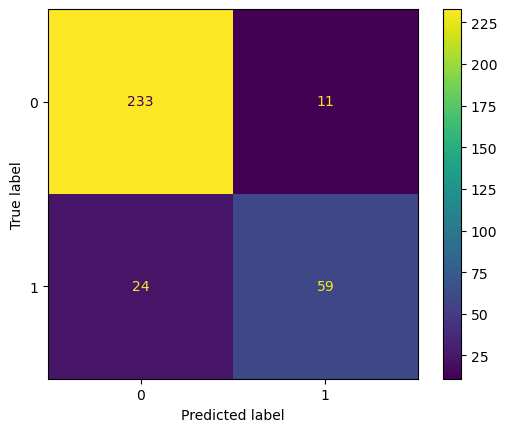

In [293]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [294]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8929663608562691
precision [0.90661479 0.84285714]
sensitivity recall [0.95491803 0.71084337]
f1 score [0.93013972 0.77124183]
mean precision 0.8747359644246804
mean recall 0.8328807031404306
mean f1 score 0.8506907753121208


## Logistic regression

### Without data splitting

In [295]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const, max_iter = 400)
r00_log = m00_log.fit_regularized()
# r00_log = m00_log.fit()

r00_log.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16770464991767756
            Iterations: 527
            Function evaluations: 528
            Gradient evaluations: 527


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1006
Method:                           MLE   Df Model:                           80
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.7131
Time:                        18:20:10   Log-Likelihood:                -182.29
converged:                       True   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                3.169e-140
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -17.2693    866.281     -0.020      0.984   -1715.149    1680.610
cp                  -4.2886      0.886     -4.839      0.000      -6.026      -2.551
cmean                2.1379      0.447      4.783      0.000       1.262       3.014
cmin                -0.3332      0.199     -1.676      0.094      -0.723       0.056
ie                  -0.1410      0.154     -0.916      0.359      -0.442       0.161
mew                  0.2061      0.168      1.226      0.220      -0.123       0.536
meg                  0.0375      0.244      0.154      0.878      -0.441       0.516
megmax               0.0746      0.229      0.326      0.745      -0.375       0.524
dbusl               -0.5961      0.216     -2.763      0.006      -1.019      -0.173
dtraml               0.5727      0.231      2.478      0.013       0.120       1.026
dtrainl              0.5110      0.197      2.588      0.010       0.124       0.898
dplight              0.0815      0.168      0.487      0.626      -0.247       0.410
dstation             0.1294      0.205      0.630      0.528      -0.273       0.532
dparkcar            -0.1927      0.190     -1.013      0.311      -0.565       0.180
dparktw             -0.1934      0.192     -1.009      0.313      -0.569       0.182
dpedcro              0.0307      0.178      0.172      0.863      -0.318       0.379
dstopsign            0.5054      0.215      2.349      0.019       0.084       0.927
dtrafficarea         0.2716      0.214      1.268      0.205      -0.148       0.691
droad               -0.2379      0.193     -1.235      0.217      -0.616       0.140
dvfpath             -0.2900      0.175     -1.653      0.098      -0.634       0.054
gvm_dwv             -0.0750      0.176     -0.425      0.671      -0.421       0.271
bicyclecount        -0.4096      0.184     -2.229      0.026      -0.770      -0.049
carcount             0.0485      0.182      0.267      0.790      -0.307       0.404
r_width_value       -2.0006      0.381     -5.256      0.000      -2.747      -1.255
speedlimit_value    -0.4284      0.398     -1.075      0.282      -1.209       0.353
z_qnr_1             15.0811      2.785      5.415      0.000       9.622      20.540
z_qnr_2              8.6019      2.388      3.602      0.000       3.922      13.282
z_qnr_3             11.2846      2.600      4.340      0.000       6.189      16.380
z_qnr_4             13.1817      2.808      4.694      0.000       7.677      18.686
z_qnr_5              9.5203      2.319      4.106      0.000       4.976      14.065
z_qnr_6              9.4172      3.430      2.745      0.006       2.694      16.140
z_qnr_7             14.4460      2.447      5.904      0.000       9.650      19.242
z_qnr_8             12.5402      2.281      5.498      0.000       8.070      17.010
z_qnr_9             11.5530      2.714      4.256      0.000       6.233      16.873
z_qnr_10             1.5088      2.194      0.688      0.492      -2.792       5.810
z_qnr_11   

In [445]:
dfp = r00_log.pvalues
print(dfp[dfp<=0.05].size)
dfp[dfp<=0.05]

43


cp               1.306684e-06
cmean            1.724401e-06
dbusl            5.724079e-03
dtraml           1.319414e-02
dtrainl          9.662951e-03
dstopsign        1.880163e-02
bicyclecount     2.580492e-02
r_width_value    1.471926e-07
z_qnr_1          6.134645e-08
z_qnr_2          3.154278e-04
z_qnr_3          1.422023e-05
z_qnr_4          2.684121e-06
z_qnr_5          4.024743e-05
z_qnr_6          6.042362e-03
z_qnr_7          3.558690e-09
z_qnr_8          3.834405e-08
z_qnr_9          2.080424e-05
z_qnr_11         3.014489e-05
z_qnr_12         1.779374e-05
z_qnr_14         5.138375e-05
z_qnr_15         1.324303e-07
z_qnr_16         2.744584e-04
z_qnr_17         2.078618e-02
z_qnr_18         5.259348e-03
z_qnr_21         1.101800e-03
z_qnr_22         4.673398e-02
z_qnr_28         4.275707e-02
z_qnr_29         4.462313e-02
z_knr_1          2.359744e-07
z_knr_2          1.415487e-03
z_knr_3          1.712315e-06
z_knr_4          1.215942e-02
z_knr_6          1.639060e-07
z_knr_7   

0.9356025758969642

Test accuracy : 
 0.9356025758969642

Confusion Matrix : 
 [[759  33]
 [ 37 258]]
accuracy 0.9356025758969642
precision [0.95351759 0.88659794]
sensitivity recall [0.95833333 0.87457627]
f1 score [0.9559194  0.88054608]
mean precision 0.9200577630420141
mean recall 0.9164548022598871
mean f1 score 0.9182327352756596


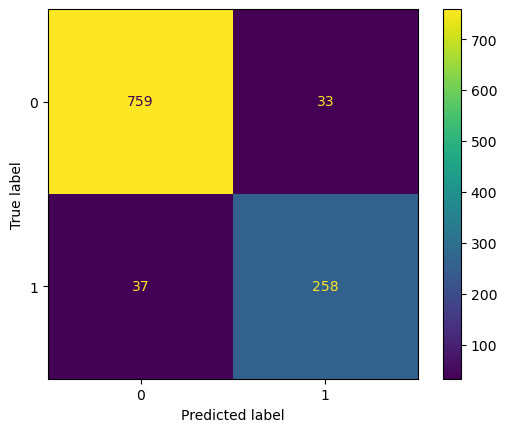

In [296]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [297]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=6)
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 400)
r00_log_split = m00_log_split.fit_regularized()
r00_log_split.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.15988695168482886
            Iterations: 548
            Function evaluations: 548
            Gradient evaluations: 548


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  760
Model:                          Logit   Df Residuals:                      679
Method:                           MLE   Df Model:                           80
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.7226
Time:                        18:20:37   Log-Likelihood:                -121.51
converged:                       True   LL-Null:                       -438.01
Covariance Type:            nonrobust   LLR p-value:                 6.423e-87
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -17.9650    773.111     -0.023      0.981   -1533.234    1497.304
cp                  -5.7572      1.277     -4.507      0.000      -8.261      -3.254
cmean                2.6839      0.628      4.274      0.000       1.453       3.914
cmin                -0.3349      0.220     -1.522      0.128      -0.766       0.096
ie                  -0.2747      0.214     -1.282      0.200      -0.695       0.145
mew                 -0.0947      0.236     -0.402      0.688      -0.557       0.367
meg                  0.3430      0.313      1.095      0.274      -0.271       0.957
megmax               0.1001      0.294      0.341      0.733      -0.475       0.676
dbusl               -0.5549      0.282     -1.968      0.049      -1.107      -0.002
dtraml               0.7985      0.317      2.522      0.012       0.178       1.419
dtrainl              0.4939      0.252      1.957      0.050      -0.001       0.989
dplight              0.0102      0.217      0.047      0.963      -0.416       0.436
dstation             0.2867      0.271      1.059      0.290      -0.244       0.817
dparkcar            -0.1153      0.239     -0.483      0.629      -0.583       0.352
dparktw             -0.3535      0.253     -1.395      0.163      -0.850       0.143
dpedcro             -0.1186      0.220     -0.539      0.590      -0.550       0.313
dstopsign            0.8459      0.292      2.899      0.004       0.274       1.418
dtrafficarea         0.3274      0.272      1.203      0.229      -0.206       0.861
droad               -0.2035      0.244     -0.833      0.405      -0.683       0.276
dvfpath             -0.5648      0.247     -2.291      0.022      -1.048      -0.082
gvm_dwv             -0.0621      0.238     -0.261      0.794      -0.529       0.404
bicyclecount        -0.3242      0.233     -1.390      0.164      -0.781       0.133
carcount            -0.0880      0.225     -0.391      0.696      -0.529       0.353
r_width_value       -1.9907      0.462     -4.305      0.000      -2.897      -1.084
speedlimit_value    -1.2392      0.592     -2.094      0.036      -2.399      -0.079
z_qnr_1             15.3531      3.681      4.171      0.000       8.139      22.567
z_qnr_2              9.5628      3.036      3.150      0.002       3.612      15.514
z_qnr_3             11.7589      3.339      3.522      0.000       5.214      18.303
z_qnr_4             13.2440      3.745      3.537      0.000       5.904      20.584
z_qnr_5              9.6519      2.873      3.360      0.001       4.022      15.282
z_qnr_6              9.0239      3.816      2.365      0.018       1.544      16.504
z_qnr_7             16.2820      3.236      5.031      0.000       9.939      22.625
z_qnr_8             12.6471      2.809      4.502      0.000       7.141      18.153
z_qnr_9             11.4812      3.341      3.437      0.001       4.933      18.029
z_qnr_10             2.2430      2.752      0.815      0.415      -3.152       7.638
z_qnr_11   

In [446]:
dfp = r00_log_split.pvalues
print(dfp[dfp<=0.05].size)
dfp[dfp<=0.05]

38


cp                  6.561541e-06
cmean               1.916094e-05
dbusl               4.904345e-02
dtraml              1.165641e-02
dstopsign           3.744380e-03
dvfpath             2.193859e-02
r_width_value       1.672213e-05
speedlimit_value    3.627035e-02
z_qnr_1             3.027563e-05
z_qnr_2             1.634997e-03
z_qnr_3             4.288914e-04
z_qnr_4             4.052321e-04
z_qnr_5             7.795429e-04
z_qnr_6             1.805351e-02
z_qnr_7             4.878186e-07
z_qnr_8             6.729533e-06
z_qnr_9             5.891388e-04
z_qnr_11            3.463589e-04
z_qnr_12            6.994597e-04
z_qnr_14            6.666060e-04
z_qnr_15            1.513492e-05
z_qnr_16            8.032517e-04
z_qnr_17            2.992691e-02
z_qnr_18            9.761518e-03
z_qnr_21            3.151493e-03
z_qnr_22            3.755522e-02
z_knr_1             7.774384e-05
z_knr_2             8.084036e-03
z_knr_3             2.428342e-04
z_knr_6             5.896053e-06
z_knr_7   

0.9357798165137615

Test accuracy : 
 0.9357798165137615

Confusion Matrix : 
 [[222  10]
 [ 11  84]]
accuracy 0.9357798165137615
precision [0.9527897  0.89361702]
sensitivity recall [0.95689655 0.88421053]
f1 score [0.95483871 0.88888889]
mean precision 0.9232033604237055
mean recall 0.9205535390199637
mean f1 score 0.9218637992831541


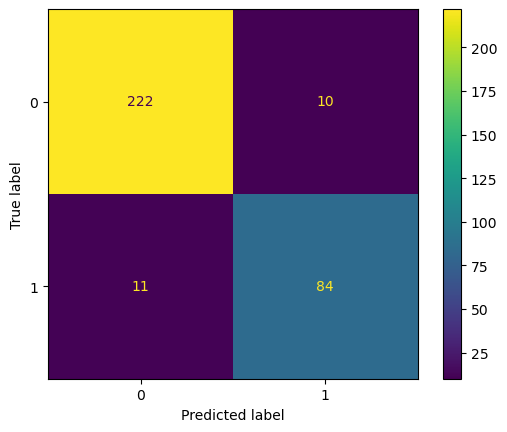

In [299]:
pred00log_split = r00_log.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

In [50]:
# Check sklearn metrics name for feature selection
# sklearn.metrics.get_scorer_names()

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [118]:
# Find the best size

# Scoring = neg_mean_squared_error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 2,
#                                 scoring='neg_mean_squared_error',
#                                 cv=25,
#                                 n_jobs = -1
#                                )
# selected_features8 = sfs.fit(x, y)

# Scoring = r2
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='r2',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features10 = sfs.fit(x, y)

# # # Scoring = median absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_median_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features13 = sfs.fit(x, y)

# # Scoring = mean absolute error
# sfs = SequentialFeatureSelector(linear_model.LinearRegression(),
#                                 k_features='best',
#                                 forward=True,
#                                 floating=True,
#                                 verbose = 1,
#                                 scoring='neg_mean_absolute_error',
#                                 cv=20,
#                                 n_jobs = -1
#                                )
# selected_features16 = sfs.fit(x, y)


In [112]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
sffslin0 = featureselection_lin(True, 'neg_mean_squared_error', 5, x, y) 
print(sffslin0.k_feature_names_)
print(len(sffslin0.k_feature_names_))
print(sffslin0.k_score_)


('dtrafficarea', 'droad', 'z_qnr_10', 'z_qnr_30', 'z_qnr_31', 'z_knr_8', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
14
-0.1468143631396745


In [113]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
sffslin1 = featureselection_lin(True, 'neg_mean_squared_error', 10, x, y) 
print(sffslin1.k_feature_names_)
print(len(sffslin1.k_feature_names_))
print(sffslin1.k_score_)


('dvfpath', 'r_width_value', 'z_qnr_10', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
19
-0.12106485422671336


In [114]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 15
# print(selected_features6.k_feature_names_)
# print(len(selected_features6.k_feature_names_))
# print(selected_features6.k_score_)
# # 34

In [115]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 20
# print(selected_features7.k_feature_names_)
# print(len(selected_features7.k_feature_names_))
# print(selected_features7.k_score_)
# 37

In [117]:
# # n = best, linear regression, scoring = r2, cv = 5
sffslin2 = featureselection_lin(True, 'r2', 5, x, y) 
print(sffslin2.k_feature_names_)
print(len(sffslin2.k_feature_names_))
print(sffslin2.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_23', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
25
0.09083514182795516


In [131]:
# n = best, linear regression, scoring = r2, cv = 10
sffslin3 = featureselection_lin(True, 'r2', 10, x, y) 
print(sffslin3.k_feature_names_)
print(len(sffslin3.k_feature_names_))
print(sffslin3.k_score_)

('cp', 'ie', 'mew', 'megmax', 'dparktw', 'dpedcro', 'dstopsign', 'droad', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_23', 'z_qnr_25', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_11', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
43
-0.003116770937851121


In [118]:
# # # n = best, linear regression, scoring = r2, cv = 15
# print(selected_features9.k_feature_names_)
# print(len(selected_features9.k_feature_names_))
# print(selected_features9.k_score_)
# # 59

In [119]:
# # # n = best, linear regression, scoring = r2, cv = 20
# print(selected_features10.k_feature_names_)
# print(len(selected_features10.k_feature_names_))
# print(selected_features10.k_score_)
# # 73

In [120]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
sffslin4 = featureselection_lin(True, 'neg_median_absolute_error', 5, x, y) 
print(sffslin4.k_feature_names_)
print(len(sffslin4.k_feature_names_))
print(sffslin4.k_score_)

('z_qnr_7', 'trafficarea_2', 'r_width_4', 'speedlimit_1', 'speedlimit_4')
5
-0.18490933143765312


In [133]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 10
sffslin5 = featureselection_lin(True, 'neg_median_absolute_error', 10, x, y) 
print(sffslin5.k_feature_names_)
print(len(sffslin5.k_feature_names_))
print(sffslin5.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
12
-0.13157577362107836


In [121]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 15
# print(selected_features12.k_feature_names_)
# print(len(selected_features12.k_feature_names_))
# print(selected_features12.k_score_)
# 21

In [122]:
# # n = best, linear regression, scoring = neg median absolute error, cv = 20
# print(selected_features13.k_feature_names_)
# print(len(selected_features13.k_feature_names_))
# print(selected_features13.k_score_)
# # 11

In [125]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
sffslin6 = featureselection_lin(True, 'neg_mean_absolute_error', 5, x, y) 
print(sffslin6.k_feature_names_)
print(len(sffslin6.k_feature_names_))
print(sffslin6.k_score_)

('dtrafficarea', 'z_qnr_10', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
10
-0.28187575192075237


In [124]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
sffslin7 = featureselection_lin(True, 'neg_mean_absolute_error', 10, x, y) 
print(sffslin7.k_feature_names_)
print(len(sffslin7.k_feature_names_))
print(sffslin7.k_score_)

('dplight', 'r_width_value', 'speedlimit_value', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
14
-0.2420524177831998


In [126]:
# # n = best, linear regression, scoring = neg mean absolute error, cv = 15
# print(selected_features15.k_feature_names_)
# print(len(selected_features15.k_feature_names_))
# print(selected_features15.k_score_)
# # 24

In [127]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 20
# print(selected_features16.k_feature_names_)
# print(len(selected_features16.k_feature_names_))
# print(selected_features16.k_score_)
# # 22

In [135]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(sffslin0.k_feature_names_), 
                              'nmse_cv10':list(sffslin1.k_feature_names_), 
                              'r2_cv5':list(sffslin2.k_feature_names_), 
                              'r2_cv10':list(sffslin3.k_feature_names_), 
                              'nmedae_cv5':list(sffslin4.k_feature_names_), 
                              'nmedae_cv10':list(sffslin5.k_feature_names_), 
                              'nmeae_cv5':list(sffslin6.k_feature_names_), 
                              'nmeae_cv10':list(sffslin7.k_feature_names_)}

In [136]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [137]:
df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_linearreg.csv', index = True)

In [152]:
# selected_columns = list(sffslin.k_feature_names_)


In [257]:
# # OLS
# df_selected = dfacrpv[selected_columns]

# m0 = sm.OLS(y, df_selected)
# r0 = m0.fit()
# r0.summary()

### Sequential backward floating selection

In [154]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
sbfslin0 = featureselection_lin(False, 'neg_mean_squared_error', 5, x, y) 
print(sbfslin0.k_feature_names_)
print(len(sbfslin0.k_feature_names_))
print(sbfslin0.k_score_)

('dtrafficarea', 'droad', 'z_qnr_10', 'z_qnr_30', 'z_qnr_31', 'z_knr_8', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
14
-0.1468143631396745


In [155]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
sbfslin1 = featureselection_lin(False, 'neg_mean_squared_error', 10, x, y) 
print(sbfslin1.k_feature_names_)
print(len(sbfslin1.k_feature_names_))
print(sbfslin1.k_score_)


('ie', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_10', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
20
-0.12100686105804259


In [156]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 15
# print(sbfs2.k_feature_names_)
# print(len(sbfs2.k_feature_names_))
# print(sbfs2.k_score_)
# # 26

In [157]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 20
# print(sbfs3.k_feature_names_)
# print(len(sbfs3.k_feature_names_))
# print(sbfs3.k_score_)
# # 52

In [158]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
sbfslin2 = featureselection_lin(False, 'r2', 5, x, y) 
print(sbfslin2.k_feature_names_)
print(len(sbfslin2.k_feature_names_))
print(sbfslin2.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_23', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
25
0.09083514182795516


In [159]:
# # n = best, linear regression, backward, scoring = r2, cv = 10
sbfslin3 = featureselection_lin(False, 'r2', 10, x, y) 
print(sbfslin3.k_feature_names_)
print(len(sbfslin3.k_feature_names_))
print(sbfslin3.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
41
-0.0037091494395070645


In [162]:
# # n = best, linear regression, backward, scoring = r2, cv = 15


In [163]:
# # n = best, linear regression, backward, scoring = r2, cv = 20


In [165]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
sbfslin4 = featureselection_lin(False, 'neg_median_absolute_error', 5, x, y) 
print(sbfslin4.k_feature_names_)
print(len(sbfslin4.k_feature_names_))
print(sbfslin4.k_score_)

('z_qnr_7', 'z_qnr_8', 'z_qnr_12', 'z_qnr_16', 'z_qnr_22', 'z_qnr_27', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_4', 'r_width_6', 'speedlimit_4')
13
-0.1534518932857683


In [166]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
sbfslin5 = featureselection_lin(False, 'neg_median_absolute_error', 10, x, y) 
print(sbfslin5.k_feature_names_)
print(len(sbfslin5.k_feature_names_))
print(sbfslin5.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
12
-0.13157577362107836


In [252]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 15


('z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_16', 'z_qnr_20', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_knr_9', 'trafficarea_3', 'r_width_4', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
14
-0.14787659233510794


In [254]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 20


('z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
9
-0.12273976660347483


In [167]:
# # n = best, linear regression, backward, scoring = neg mean absolute error, cv = 5
sbfslin6 = featureselection_lin(False, 'neg_mean_absolute_error', 5, x, y) 
print(sbfslin6.k_feature_names_)
print(len(sbfslin6.k_feature_names_))
print(sbfslin6.k_score_)

('dtrafficarea', 'z_qnr_10', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
10
-0.28187575192075237


In [168]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
sbfslin7 = featureselection_lin(False, 'neg_mean_absolute_error', 10, x, y) 
print(sbfslin7.k_feature_names_)
print(len(sbfslin7.k_feature_names_))
print(sbfslin7.k_score_)

('dplight', 'r_width_value', 'speedlimit_value', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
14
-0.2420524177831998


In [169]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 15


In [170]:
# n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 20


In [171]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'all': cnu,
                              'nmse_cv5':list(sbfslin0.k_feature_names_), 
                              'nmse_cv10':list(sbfslin1.k_feature_names_), 
                              'r2_cv5':list(sbfslin2.k_feature_names_), 
                              'r2_cv10':list(sbfslin3.k_feature_names_), 
                              'nmedae_cv5':list(sbfslin4.k_feature_names_), 
                              'nmedae_cv10':list(sbfslin5.k_feature_names_),
                              'nmeae_cv5':list(sbfslin6.k_feature_names_), 
                              'nmeae_cv10':list(sbfslin7.k_feature_names_)}

In [172]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [173]:
df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv', index = True)

In [188]:
sbfs_columns = list(sbfslin7.k_feature_names_)

In [100]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv')

In [101]:
# df_output.columns

Index(['Unnamed: 0', 'all', 'nmse_cv5', 'nmse_cv10', 'r2_cv5', 'r2_cv10',
       'nmedae_cv5', 'nmedae_cv10', 'nmeae_cv5', 'nmeae_cv10'],
      dtype='object')

In [102]:
# prsq_lin_sffs = []
# prsq_lin_sbfs = []

In [131]:


# ## For sffs
# l = list(df_output['nmeae_cv10'].dropna())

# # x_selected
# xs = dfacrpv[l]

In [451]:
# # OLS
# xs_const = tools.add_constant(xs) 
# # X_train, X_test, y_train, y_test = train_test_split(
# #         df_selected, y,
# #         test_size=0.3,
# #         random_state=0)

# m1 = sm.OLS(y, xs_const)
# r1 = m1.fit()
# r1.summary()

In [133]:
# prsq_lin_sbfs.append(r1.rsquared_adj)

In [134]:
prsq_lin_sbfs

[0.46863270188062633,
 0.5228831125625122,
 0.5083388939077372,
 0.539473692009008,
 0.4665037273438992,
 0.47415516300643146,
 0.46239446930329153,
 0.5033154652889078]

In [96]:
prsq_lin_sffs

[0.46863270188062633,
 0.5170176533771211,
 0.5083388939077372,
 0.5299324651839028,
 0.42039652784715786,
 0.47415516300643146,
 0.46239446930329153,
 0.5033154652889078]

## Logistic Regression model

### Sequential forward floating selection

In [300]:
# # n = best, logistic regression, scoring = accuracy, cv = 5
sffslog0 = featureselection_log(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)


('cp', 'cmean', 'cmin', 'ie', 'mew', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dpedcro', 'droad', 'dvfpath', 'gvm_dwv', 'r_width_value', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_16', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_1', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
44
0.875774743161544


In [52]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sffslog1 = featureselection_log(True, 'accuracy', 10, x, y)
print(sffslog1.k_feature_names_)
print(len(sffslog1.k_feature_names_))
print(sffslog1.k_score_)


('cmin', 'ie', 'mew', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'bicyclecount', 'r_width_value', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_15', 'z_qnr_16', 'z_qnr_20', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_6', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
45
0.8665222562011554


In [53]:
# # # n = best, logistic regression, scoring = accuracy, cv = 15
# sffslog2 = featureselection_log(True, 'accuracy', 15, x, y)
# print(sffslog2.k_feature_names_)
# print(len(sffslog2.k_feature_names_))
# print(sffslog2.k_score_)

In [54]:
# # # n = best, logistic regression, scoring = accuracy, cv = 20
# sffslog3 = featureselection_log(True, 'accuracy', 20, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)
# #

In [55]:
# # n = best, logistic regression, scoring = f1, cv = 5
sffslog2 = featureselection_log(True, 'f1', 5, x, y)
print(sffslog2.k_feature_names_)
print(len(sffslog2.k_feature_names_))
print(sffslog2.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dstation', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'dvfpath', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_11', 'z_qnr_14', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_29', 'z_qnr_30', 'z_knr_4', 'z_knr_6', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
43
0.7270122755961848


In [56]:
# # n = best, logistic regression, scoring = f1, cv = 10
sffslog3 = featureselection_log(True, 'f1', 10, x, y)
print(sffslog3.k_feature_names_)
print(len(sffslog3.k_feature_names_))
print(sffslog3.k_score_)


('cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'carcount', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_12', 'z_qnr_13', 'z_qnr_15', 'z_qnr_16', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_5', 'speedlimit_4')
45
0.7102975544358622


In [57]:
# # # n = best, logistic regression, scoring = f1, cv = 15
# sffslog6 = featureselection_log(True, 'f1', 15, x, y)
# print(sffslog6.k_feature_names_)
# print(len(sffslog6.k_feature_names_))
# print(sffslog6.k_score_)
# #

In [58]:
# # # n = best, logistic regression, scoring = f1, cv = 20
# sffslog7 = featureselection_log(True, 'f1', 20, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)
# #

In [450]:
# # n = best, logistic regression, scoring = precision, cv = 5
# sffslog4 = featureselection_log(True, 'precision', 5, x, y)
# print(sffslog4.k_feature_names_)
# print(len(sffslog4.k_feature_names_))
# print(sffslog4.k_score_)


In [449]:
# # # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog5 = featureselection_log(True, 'precision', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)

In [61]:
# # # n = best, logistic regression, scoring = precision, cv = 15
# sffslog10 = featureselection_log(True, 'precision', 15, x, y)
# print(sffslog10.k_feature_names_)
# print(len(sffslog10.k_feature_names_))
# print(sffslog10.k_score_)

In [62]:
# # # n = best, logistic regression, scoring = precision, cv = 20
# sffslog11 = featureselection_log(True, 'precision', 20, x, y)
# print(sffslog11.k_feature_names_)
# print(len(sffslog11.k_feature_names_))
# print(sffslog11.k_score_)


In [63]:
# # n = best, logistic regression, scoring = recall, cv = 5
sffslog6 = featureselection_log(True, 'recall', 5, x, y)
print(sffslog6.k_feature_names_)
print(len(sffslog6.k_feature_names_))
print(sffslog6.k_score_)


('cmin', 'ie', 'mew', 'meg', 'megmax', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_10', 'z_knr_11', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
58
0.688135593220339


In [64]:
# # n = best, logistic regression, scoring = recall, cv = 10
sffslog7 = featureselection_log(True, 'recall', 10, x, y)
print(sffslog7.k_feature_names_)
print(len(sffslog7.k_feature_names_))
print(sffslog7.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'megmax', 'dplight', 'dpedcro', 'dtrafficarea', 'droad', 'gvm_dwv', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_20', 'z_qnr_23', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_4', 'z_knr_9', 'z_knr_10', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
37
0.6709195402298851


In [65]:
# # # n = best, logistic regression, scoring = recall, cv = 15
# sffslog14 = featureselection_log(True, 'recall', 15, x, y)
# print(sffslog14.k_feature_names_)
# print(len(sffslog14.k_feature_names_))
# print(sffslog14.k_score_)
# #

In [66]:
# # # n = best, logistic regression, scoring = recall, cv = 20
# sffslog15 = featureselection_log(True, 'recall', 20, x, y)
# print(sffslog15.k_feature_names_)
# print(len(sffslog15.k_feature_names_))
# print(sffslog15.k_score_)
# #

In [86]:
# For part 
selected_columns_logr_sffs = []
selected_columns_logr_sffs = {'all': cnu2,
                              'acc_cv5':list(sffslog0.k_feature_names_), 
                              'acc_cv10':list(sffslog1.k_feature_names_), 
                              'f1_cv5':list(sffslog2.k_feature_names_), 
                              'f1_cv10':list(sffslog3.k_feature_names_), 
                              'pre_cv5':list(sffslog4.k_feature_names_), 
                              'pre_cv10':list(sffslog5.k_feature_names_),
                              'rec_cv5':list(sffslog6.k_feature_names_), 
                              'rec_cv10':list(sffslog7.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated2_sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [301]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection_log(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)


('cp', 'cmean', 'cmin', 'ie', 'mew', 'meg', 'dpedcro', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount', 'r_width_value', 'z_qnr_1', 'z_qnr_3', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_11', 'z_qnr_14', 'z_qnr_22', 'z_qnr_26', 'z_knr_3', 'z_knr_4', 'z_knr_6', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
35
0.8812920136980509


In [302]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sbfslog1 = featureselection_log(False, 'accuracy', 10, x, y)
print(sbfslog1.k_feature_names_)
print(len(sbfslog1.k_feature_names_))
print(sbfslog1.k_score_)


('megmax', 'speedlimit_value', 'z_qnr_5', 'z_qnr_7', 'z_qnr_12', 'z_qnr_23', 'z_knr_2', 'z_knr_6', 'z_knr_9', 'r_width_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
15
0.8776163778457355


In [303]:
# # n = best, logistic regression, scoring = accuracy, cv = 15
# sbfslog2 = featureselection_log(False, 'accuracy', 15, x, y)
# print(sbfslog2.k_feature_names_)
# print(len(sbfslog2.k_feature_names_))
# print(sbfslog2.k_score_)


In [304]:
# # n = best, logistic regression, scoring = accuracy, cv = 20
# sbfslog3 = featureselection_log(False, 'accuracy', 20, x, y)
# print(sbfslog3.k_feature_names_)
# print(len(sbfslog3.k_feature_names_))
# print(sbfslog3.k_score_)


In [305]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog2 = featureselection_log(False, 'f1', 5, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)

('cp', 'cmean', 'cmin', 'meg', 'droad', 'carcount', 'speedlimit_value', 'z_qnr_7', 'z_qnr_10', 'z_qnr_23', 'z_qnr_26', 'z_qnr_29', 'z_knr_1', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
23
0.7480908152734779


In [306]:
# n = best, logistic regression, scoring = f1, cv = 10
sbfslog3 = featureselection_log(False, 'f1', 10, x, y)
print(sbfslog3.k_feature_names_)
print(len(sbfslog3.k_feature_names_))
print(sbfslog3.k_score_)

('cp', 'cmean', 'mew', 'droad', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_4', 'z_qnr_7', 'z_qnr_10', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
23
0.7546771511164502


In [307]:
# # n = best, logistic regression, scoring = f1, cv = 15
# sbfslog6 = featureselection_log(False, 'f1', 15, x, y)
# print(sbfslog6.k_feature_names_)
# print(len(sbfslog6.k_feature_names_))
# print(sbfslog6.k_score_)

In [308]:
# n = best, logistic regression, scoring = f1, cv = 20
# sbfslog7 = featureselection_log(False, 'f1', 20, x, y)
# print(sbfslog7.k_feature_names_)
# print(len(sbfslog7.k_feature_names_))
# print(sbfslog7.k_score_)

In [448]:
# # # n = best, logistic regression, scoring = precision, cv = 5
# sbfslog4 = featureselection_log(False, 'precision', 5, x, y)
# print(sbfslog4.k_feature_names_)
# print(len(sbfslog4.k_feature_names_))
# print(sbfslog4.k_score_)

In [447]:
# # # n = best, logistic regression, scoring = precision, cv = 10
# sbfslog5 = featureselection_log(False, 'precision', 10, x, y)
# print(sbfslog5.k_feature_names_)
# print(len(sbfslog5.k_feature_names_))
# print(sbfslog5.k_score_)

In [311]:
# # n = best, logistic regression, scoring = precision, cv = 15
# sbfslog10 = featureselection_log(False, 'precision', 15, x, y)
# print(sbfslog10.k_feature_names_)
# print(len(sbfslog10.k_feature_names_))
# print(sbfslog10.k_score_)

In [312]:
# # n = best, logistic regression, scoring = precision, cv = 20
# sbfslog11 = featureselection_log(False, 'precision', 20, x, y)
# print(sbfslog11.k_feature_names_)
# print(len(sbfslog11.k_feature_names_))
# print(sbfslog11.k_score_)

In [313]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog6 = featureselection_log(False, 'recall', 5, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)

('speedlimit_value', 'z_qnr_5', 'z_qnr_7', 'z_qnr_10', 'z_qnr_12', 'z_qnr_25', 'z_knr_1', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_11', 'trafficarea_2', 'r_width_6', 'r_surface_1', 'speedlimit_4')
15
0.6711864406779661


In [314]:
# n = best, logistic regression, scoring = recall, cv = 10
sbfslog7 = featureselection_log(False, 'recall', 10, x, y)
print(sbfslog7.k_feature_names_)
print(len(sbfslog7.k_feature_names_))
print(sbfslog7.k_score_)

('cp', 'cmean', 'ie', 'mew', 'megmax', 'dtrainl', 'dparkcar', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_6', 'z_qnr_7', 'z_qnr_10', 'z_qnr_12', 'z_qnr_16', 'z_qnr_23', 'z_knr_4', 'z_knr_5', 'z_knr_8', 'z_knr_9', 'trafficarea_2', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
32
0.7113793103448277


In [315]:
# # n = best, logistic regression, scoring = recall, cv = 15
# sbfslog14 = featureselection_log(False, 'recall', 15, x, y)
# print(sbfslog14.k_feature_names_)
# print(len(sbfslog14.k_feature_names_))
# print(sbfslog14.k_score_)
# #

In [316]:
# # n = best, logistic regression, scoring = recall, cv = 20
# sbfslog15 = featureselection_log(False, 'recall', 20, x, y)
# print(sbfslog15.k_feature_names_)
# print(len(sbfslog15.k_feature_names_))
# print(sbfslog15.k_score_)
# #

In [317]:
# For all 
selected_columns_logr_sbfs = []
selected_columns_logr_sbfs = {'all': cnu1,
                              'acc_cv5':list(sbfslog0.k_feature_names_), 
                              'acc_cv10':list(sbfslog1.k_feature_names_),
                              'f1_cv5':list(sbfslog2.k_feature_names_), 
                              'f1_cv10':list(sbfslog3.k_feature_names_),
                              'pre_cv5':list(sbfslog4.k_feature_names_), 
                              'pre_cv10':list(sbfslog5.k_feature_names_),
                              'rec_cv5':list(sbfslog6.k_feature_names_), 
                              'rec_cv10':list(sbfslog7.k_feature_names_)
                              }
df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated1_sbfs_logisticreg.csv', index = True)

In [322]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_logisticreg.csv')
df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated1_sffs_logisticreg.csv')

In [91]:
na = []
na = ['acc_cv5','acc_cv10','f1_cv5','f1_cv10','pre_cv5','pre_cv10','rec_cv5','rec_cv10']

In [93]:
len(selected_columns_logr_sffs[na[0]])

51

In [387]:
log_sffs = []
log_sbfs = []

In [437]:
# l = list(df_output['rec_cv10'].dropna())
# i = 0
i = i+1
l = selected_columns_logr_sbfs[na[i]]
# l = list(df_output[na[i]].dropna())
print(i)

7


In [438]:
# x_selected
xs = dfacrpv[l]

In [439]:
# # with splitting
# xs_const = tools.add_constant(xs)
# X_train, X_test, y_train, y_test = train_test_split(
#         xs_const, y,
#         test_size=0.2,
#         random_state=i+10)
# m_log_split = sm.Logit(y_train, X_train, max_iter = 400)
# r_log_split = m_log_split.fit_regularized()
# r_log_split.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25229817644358854
            Iterations: 252
            Function evaluations: 252
            Gradient evaluations: 252


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  869
Model:                          Logit   Df Residuals:                      836
Method:                           MLE   Df Model:                           32
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.5686
Time:                        19:21:32   Log-Likelihood:                -219.25
converged:                       True   LL-Null:                       -508.21
Covariance Type:            nonrobust   LLR p-value:                2.111e-101
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -20.9619   3309.383     -0.006      0.995   -6507.234    6465.310
cp                  -3.0683      0.684     -4.485      0.000      -4.409      -1.727
cmean                1.5397      0.339      4.549      0.000       0.876       2.203
ie                  -0.0764      0.126     -0.605      0.545      -0.324       0.171
mew                  0.1531      0.135      1.132      0.258      -0.112       0.418
megmax              -0.0214      0.135     -0.158      0.874      -0.287       0.244
dtrainl              0.1407      0.143      0.982      0.326      -0.140       0.422
dparkcar            -0.0303      0.142     -0.213      0.831      -0.309       0.248
droad               -0.1300      0.148     -0.880      0.379      -0.420       0.160
dvfpath             -0.1829      0.142     -1.290      0.197      -0.461       0.095
gvm_dwv              0.0364      0.145      0.252      0.801      -0.247       0.320
carcount            -0.1872      0.137     -1.369      0.171      -0.455       0.081
r_width_value       -0.9074      0.224     -4.056      0.000      -1.346      -0.469
speedlimit_value    -0.3347      0.171     -1.957      0.050      -0.670       0.001
z_qnr_6             -0.9490      0.892     -1.064      0.287      -2.697       0.799
z_qnr_7              2.7685      0.718      3.853      0.000       1.360       4.177
z_qnr_10            -2.7174      0.759     -3.581      0.000      -4.205      -1.230
z_qnr_12             1.2926      0.615      2.102      0.036       0.087       2.498
z_qnr_16             1.7491      0.803      2.178      0.029       0.175       3.323
z_qnr_23            -1.9581      1.143     -1.714      0.087      -4.198       0.281
z_knr_4              2.0822      0.425      4.898      0.000       1.249       2.915
z_knr_5              1.9346      0.455      4.256      0.000       1.044       2.826
z_knr_8             -1.5526      0.664     -2.339      0.019      -2.854      -0.252
z_knr_9              2.1389      0.417      5.124      0.000       1.321       2.957
trafficarea_2       -1.5407      0.474     -3.249      0.001      -2.470      -0.611
r_width_2           -1.7597      0.710     -2.480      0.013      -3.151      -0.369
r_width_3            1.5561      0.606      2.569      0.010       0.369       2.743
r_width_4            1.2978      0.396      3.276      0.001       0.521       2.074
r_width_5            1.8994      0.468      4.057      0.000       0.982       2.817
r_width_6            1.5210      0.543      2.801      0.005       0.457       2.585
r_surface_1         19.5030   3309.383      0.006      0.995   -6466.769    6505.775
speedlimit_3        -3.3818      1.074     -3.148      0.002      -5.487      -1.276
speedlimit_4         4.1111      0.443      9.273      0.000       3.242       4.980
====================================================================================
"""

In [440]:
dfp = r_log_split.pvalues
print(dfp[dfp<=0.05].size)

19


In [441]:
dfp[dfp<=0.05]

cp               7.300956e-06
cmean            5.401771e-06
r_width_value    4.987815e-05
z_qnr_7          1.165997e-04
z_qnr_10         3.429249e-04
z_qnr_12         3.553544e-02
z_qnr_16         2.941356e-02
z_knr_4          9.661581e-07
z_knr_5          2.081705e-05
z_knr_8          1.933560e-02
z_knr_9          2.986743e-07
trafficarea_2    1.157269e-03
r_width_2        1.315068e-02
r_width_3        1.021233e-02
r_width_4        1.053746e-03
r_width_5        4.966156e-05
r_width_6        5.092233e-03
speedlimit_3     1.642190e-03
speedlimit_4     1.803932e-20
dtype: float64

In [442]:
log_sbfs.append(r_log_split.prsquared)

In [443]:
log_sbfs

[0.5879503429459954,
 0.4882945250116646,
 0.5423178733293382,
 0.6043093306456302,
 0.4200229956802286,
 0.41025709196306215,
 0.46854190728225587,
 0.5685887590511955]